In [62]:
pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 5.3 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
# Cleaning Function

In [1]:
import pandas as pd
import re
import pycountry
def credit_Chart(data):
    df = pd.read_csv(data, skiprows=5)
    df=df.fillna(0)
    df["Location"] = df["Description"].str.extract(r"\b([A-Z]{2})$")
    df=df.fillna("Off the Map")

    #Ability to map the abbreviated state to the full name of the state
    state_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut",
    "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana",
    "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana",
    "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts",
    "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska",
    "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina",
    "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
    "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee",
    "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}
    #Also able to map the abbreviated country to the full name of the country
    country_map = {c.alpha_2: c.name for c in pycountry.countries}

    location_map = {**country_map, **state_map}
    df["Location_Full"] = df["Location"].map(location_map).fillna(df["Location"])

    #Gather the merchant name from the description
    def clean_merchant(s):
        if pd.isna(s):
            return "Unknown"

        s = str(s).strip()

        #Remove trailing location codes (GA, IN, etc.)
        s = re.sub(r"\s+[A-Z]{2}\s*$", "", s)

        #Remove phone numbers/long digit sequences
        s = re.sub(r"\b\d[\d\-\(\)\s]{6,}\b", "", s)

        #Remove standalone numbers
        s = re.sub(r"\b\d+\b", "", s)

        #Keep readable merchant characters
        s = re.sub(r"[^A-Za-z&\*\s']", " ", s)

        #Normalize spacing and case
        s = re.sub(r"\s+", " ", s).strip().upper()

        return s.title() if s else "Mysterious Merchant"

    df["Merchant"] = df["Description"].apply(clean_merchant)

    #Ordered the months and turned it into a value that is able to be sorted accuractely
    df = (
        df.assign(Date=pd.to_datetime(df["Date"].str.strip(), format="%b %d, %Y"))
          .sort_values("Date")
          .reset_index(drop=True)
    )
    
    return (df)
    
credit_Chart("moredata.csv")

,Date,Description,Debit,Credit,Category,Location,Location_Full,Merchant
0,2025-01-01,WM SUPERCENTER #1766 MARIETTA GA,19.23,0.00,Merchandise,GA,Georgia,Wm Supercenter Marietta
1,2025-01-01,HOLLISTER CO. NEW ALBANY OH,0.00,-31.79,Merchandise,OH,Ohio,Hollister Co New Albany
2,2025-01-02,SOVEREIGN PEST CONTROL 8003944737 VA,193.00,0.00,Services,VA,Virginia,Sovereign Pest Control
3,2025-01-02,SOVEREIGN PEST CONTROL 8003944737 VA,193.00,0.00,Services,VA,Virginia,Sovereign Pest Control
4,2025-01-02,COSTCO WHSE #0631 ATLANTA GA,0.00,-38.95,Merchandise,GA,Georgia,Costco Whse Atlanta
...,...,...,...,...,...,...,...,...
455,2025-12-27,TRANSPORTFORNSW TAP SYDNEY AU,0.29,0.00,Other Travel,AU,Australia,Transportfornsw Tap Sydney
456,2025-12-27,CHEMIST WAREHOUSE SYDNEY AU,8.60,0.00,Health Care,AU,Australia,Chemist Warehouse Sydney
457,2025-12-28,TRANSPORTFORNSW TAP SYDNEY AU,12.05,0.00,Other Travel,AU,Australia,Transportfornsw Tap Sydney
458,2025-12-28,TRANSPORTFORNSW TAP SYDNEY AU,12.05,0.00,Other Travel,AU,Australia,Transportfornsw Tap Sydney


In [27]:
df= credit_Chart("moredata.csv")
#Found the country or state that had the most purchases and the number of purchases made there
def mostlocation(df):
    location_counts = df["Location_Full"].value_counts()

    top_location = location_counts.idxmax()
    top_count = location_counts.max()
    
    print (f"Your most visited spending location this year: {top_location}\n" f"Looks like {top_location} was your financial home base with {top_count} purchases!")
    return
mostlocation(df)

Your most visited spending location this year: Georgia
Looks like Georgia was your financial home base with 150 purchases!


In [35]:
df= credit_Chart("moredata.csv")
#Found the store that was shopped at the most and the number of times it was visted in that year
def mostmerchant(df):
    counts = df["Merchant"].value_counts()
    print (f"On heavy rotation: {counts.idxmax()}\n" f"Swiped here a total of {int(counts.max())} times this year!")
    return
mostmerchant(df)

On heavy rotation: Costco Whse Kennesaw
Swiped here a total of 29 times in 2025.


In [42]:
df= credit_Chart("moredata.csv")
#Found the day of the week that had the most transactions
def favorite_spending_day(df):
    #Different phrases a user could get depending on the day they spend the most
    phrases = {
        "Monday": [
            "Fresh start energy 💼",
            "You kicked off the week spending strong."
        ],
        "Tuesday": [
            "Midweek momentum 🔄",
            "Tuesday was quietly your spending day."
        ],
        "Wednesday": [
            "Midweek grind ⚙️",
            "Right in the middle, your spending peaked."
        ],
        "Thursday": [
            "Almost-there energy 🚀",
            "Thursday was your warm-up to the weekend."
        ],
        "Friday": [
            "Friday energy activated 🔥",
            "You really felt the end-of-week vibe."
        ],
        "Saturday": [
            "Weekend splurge mode 🛍️",
            "Saturday was made for spending."
        ],
        "Sunday": [
            "Soft life spending ☁️",
            "Sunday resets came with swipes."
        ]
    }

    line1 = f"Your top spending day was {df['Date'].dt.day_name().value_counts().idxmax()} with {df['Date'].dt.day_name().value_counts().max()} purchases!"
    line2 = phrases.get(df['Date'].dt.day_name().value_counts().idxmax(), ["Your spending had no chill 😅"])[0]

    print (f"{line1}\n{line2}")
    return

favorite_spending_day(df)

📅 Your top spending day was Saturday with 92 purchases!
Weekend splurge mode 🛍️


In [48]:
df= credit_Chart("moredata.csv")
#Found the biggest purchase of the year and delivered key information about it
def biggest_purchase(df):
    print("Let's take a look at the bill for the largest purchase made this year:")
    return df.loc[df["Debit"].idxmax()]
biggest_purchase(df)

Let's take a look at the bill for the largest purchase made this year:


Date                        2025-01-12 00:00:00
Description      WWW COSTCO COM 800-955-2292 WA
Debit                                    635.99
Credit                                      0.0
Category                            Merchandise
Location                                     WA
Location_Full                        Washington
Merchant                         Www Costco Com
Name: 40, dtype: object

Places that got you feeling like money grows on trees!


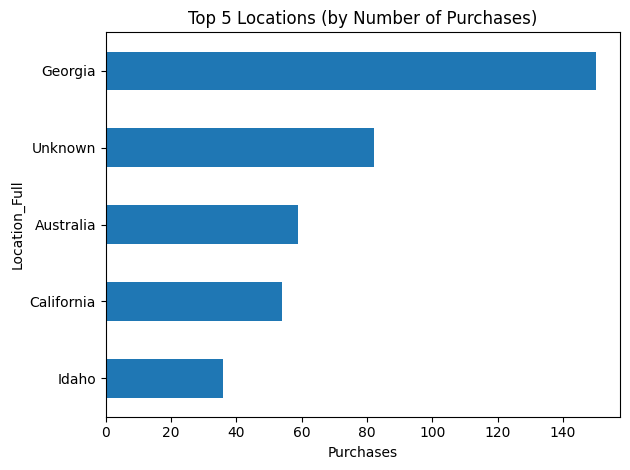

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
#Created a bar chart with the top 5 places with the most purchases
df= credit_Chart("moredata.csv")

df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

if "Amount" in df.columns:
    df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce").fillna(0)

top5 = df["Location_Full"].value_counts().head(5)

plt.figure()
top5.sort_values().plot(kind="barh")
plt.title("Top 5 Places I Swiped The Most")
plt.xlabel("Purchases")
plt.ylabel("Location_Full")
plt.tight_layout()
print ("Places that got you feeling like money grows on trees!")
plt.show()


Your top 5 Locations that you couldn't stop yourself from splurging!


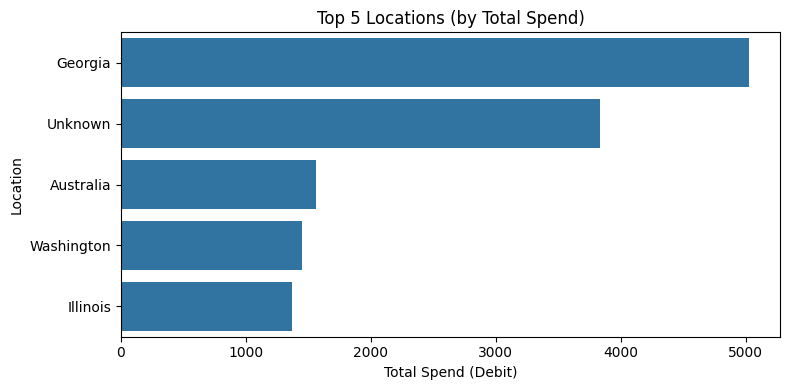

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Created a bar chart with the top 5 places with the most money spent

df = credit_Chart("moredata.csv")

if "Debit" in df.columns:
    # Clean Debit -> numeric (handles $, commas, parentheses)
    df["Debit_num"] = (
        df["Debit"].astype(str)
          .str.replace(r"[\$,]", "", regex=True)
          .str.replace(r"^\((.*)\)$", r"-\1", regex=True)  # just in case
          .str.strip()
    )
    df["Debit_num"] = pd.to_numeric(df["Debit_num"], errors="coerce").fillna(0)

    top5_spend = (
        df.groupby("Location_Full", as_index=False)["Debit_num"]
          .sum()
          .sort_values("Debit_num", ascending=False)
          .head(5)
    )

    plt.figure(figsize=(8, 4))
    sns.barplot(data=top5_spend, x="Debit_num", y="Location_Full", errorbar=None)
    plt.title("Top 5 Places I Spent The Most")
    plt.xlabel("Total Spend (Debit)")
    plt.ylabel("Location")
    plt.tight_layout()
    print ("Your top 5 Locations that you couldn't stop yourself from splurging!")
    plt.show()
else:
    print("No 'Debit' column found. Run df.columns to see the exact name.")


AttributeError: 'Index' object has no attribute 'strftime'

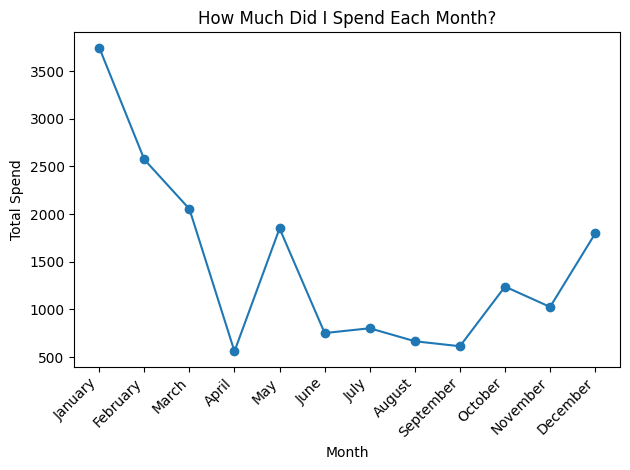

In [18]:
import matplotlib.pyplot as plt

df = credit_Chart("moredata.csv")
#Created a line chart that analyzed the total amount of money spent each month
if "Debit" in df.columns:
    monthly = df.dropna(subset=["Date"]).groupby(df["Date"].dt.to_period("M"))["Debit"].sum()
    monthly.index = monthly.index.to_timestamp().strftime("%B")

    plt.figure()
    plt.plot(monthly.index, monthly.values, marker="o")
    plt.title("How Much Did I Spend Each Month?")
    plt.xlabel("Month")
    plt.ylabel("Total Spend")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.gca().set_xticklabels(monthly.index.strftime("%b"))
    plt.show()
else:
    print("No 'Debit' column found, so I can't plot monthly spend. (I *can* plot monthly transaction count if you want.)")


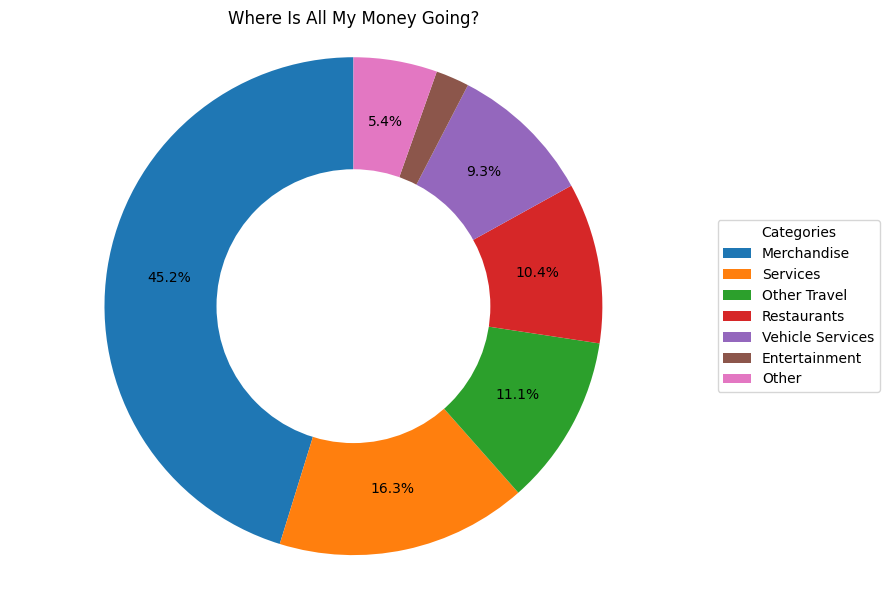

In [16]:
import matplotlib.pyplot as plt
#Created a pie chart that analyzed percent of money spent in different categories 

def clean_category_pie(df, category_col="Category", top_n=6):
    counts = df[category_col].fillna("Unspecified").value_counts()

    top = counts.head(top_n)
    other = counts.iloc[top_n:].sum()

    plot_data = top.copy()
    if other > 0:
        plot_data["Other"] = other

    def autopct_big(pct):
        #Kept slices of the pie that were equal to or bigger than 3%
        return f"{pct:.1f}%" if pct >= 3 else ""

    fig, ax = plt.subplots(figsize=(9, 6))
    wedges, texts, autotexts = ax.pie(
        plot_data.values,
        #No labels to maintain the clean look
        labels=None,      
        autopct=autopct_big,
        startangle=90,
        pctdistance=0.75
    )

    #Created the donut hole shape to make it cleaner
    centre_circle = plt.Circle((0, 0), 0.55, fc="white")
    ax.add_artist(centre_circle)

    ax.set_title("Where Is All My Money Going?")
    ax.axis("equal")

    #Legend on the side to understand what each slice corresponds to
    ax.legend(
        wedges,
        plot_data.index,
        title="Categories",
        loc="center left",
        bbox_to_anchor=(1.02, 0.5)
    )

    plt.tight_layout()
    plt.show()

clean_category_pie(df, category_col="Category", top_n=6)


In [11]:
import pandas as pd
import pandas as pd
import re
import pycountry
def credit_Chart(data):
    df = pd.read_csv(data, skiprows=5)
    df=df.fillna(0)
    df["Location"] = df["Description"].str.extract(r"\b([A-Z]{2})$")
    df=df.fillna("Off the Map")

    #Ability to map the abbreviated state to the full name of the state
    state_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas",
    "CA": "California", "CO": "Colorado", "CT": "Connecticut",
    "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana",
    "IA": "Iowa", "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana",
    "ME": "Maine", "MD": "Maryland", "MA": "Massachusetts",
    "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi",
    "MO": "Missouri", "MT": "Montana", "NE": "Nebraska",
    "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina",
    "ND": "North Dakota", "OH": "Ohio", "OK": "Oklahoma",
    "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island",
    "SC": "South Carolina", "SD": "South Dakota", "TN": "Tennessee",
    "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia",
    "WI": "Wisconsin", "WY": "Wyoming"
}
    #Also able to map the abbreviated country to the full name of the country
    country_map = {c.alpha_2: c.name for c in pycountry.countries}

    location_map = {**country_map, **state_map}
    df["Location_Full"] = df["Location"].map(location_map).fillna(df["Location"])

    #Gather the merchant name from the description
    def clean_merchant(s):
        if pd.isna(s):
            return "Unknown"

        s = str(s).strip()

        #Remove trailing location codes (GA, IN, etc.)
        s = re.sub(r"\s+[A-Z]{2}\s*$", "", s)

        #Remove phone numbers/long digit sequences
        s = re.sub(r"\b\d[\d\-\(\)\s]{6,}\b", "", s)

        #Remove standalone numbers
        s = re.sub(r"\b\d+\b", "", s)

        #Keep readable merchant characters
        s = re.sub(r"[^A-Za-z&\*\s']", " ", s)

        #Normalize spacing and case
        s = re.sub(r"\s+", " ", s).strip().upper()

        return s.title() if s else "Mysterious Merchant"

    df["Merchant"] = df["Description"].apply(clean_merchant)

    #Ordered the months and turned it into a value that is able to be sorted accuractely
    df = (
        df.assign(Date=pd.to_datetime(df["Date"].str.strip(), format="%b %d, %Y"))
          .sort_values("Date")
          .reset_index(drop=True)
    )
    
    return (df)
    
df=credit_Chart("moredata.csv")

def classify_spender(df):
    d = df.copy()

    if "Date" not in d.columns:
        return {"persona": "Data Missing", "why": "No 'Date' column found."}
    d["Date"] = pd.to_datetime(d["Date"], errors="coerce")
    d = d.dropna(subset=["Date"])

    if "Debit_num" in d.columns:
        d["spend"] = pd.to_numeric(d["Debit_num"], errors="coerce").fillna(0)
    elif "Debit" in d.columns:
        d["spend"] = (
            d["Debit"].astype(str)
              .str.replace(r"[\$,]", "", regex=True)
              .str.replace(r"^\((.*)\)$", r"-\1", regex=True)
              .str.strip()
        )
        d["spend"] = pd.to_numeric(d["spend"], errors="coerce").fillna(0)
    else:
        return {"persona": "Data Missing", "why": "No 'Debit' or 'Debit_num' column found."}

    #Keep only actual spending ignore nugative
    d = d[d["spend"] > 0]
    if d.empty:
        return {"persona": "No Spend Detected", "why": "No positive debit transactions found."}

    tx_count = len(d)
    total_spend = float(d["spend"].sum())
    avg_tx = float(d["spend"].mean())
    median_tx = float(d["spend"].median())

    days_active = d["Date"].dt.normalize().nunique()
    purchases_per_active_day = tx_count / max(days_active, 1)

    weekend_ratio = float(d["Date"].dt.dayofweek.isin([5, 6]).mean())  # Sat/Sun

    #Loyalty to one merchant/location
    top_merchant_share = None
    if "Merchant" in d.columns:
        top_merchant_share = float(d["Merchant"].value_counts(normalize=True).iloc[0])

    top_location_share = None
    loc_col = "Location_Full" if "Location_Full" in d.columns else ("Location" if "Location" in d.columns else None)
    if loc_col:
        top_location_share = float(d[loc_col].value_counts(normalize=True).iloc[0])

    small_purchase_ratio = float((d["spend"] < 10).mean())
    big_purchase_ratio = float((d["spend"] >= 100).mean())

    #Simple personality
    persona = "Balanced Spender"
    reasons = []

    #Frequent small purchases
    if purchases_per_active_day >= 2 and small_purchase_ratio >= 0.35 and avg_tx < 25:
        persona = "Micro-Spender (Small Buys on Repeat)"
        reasons.append("You make lots of low-cost purchases and buy often.")

    #Big-ticket spender
    elif big_purchase_ratio >= 0.18 or avg_tx >= 80:
        persona = "Big-Ticket Spender (High Impact Purchases)"
        reasons.append("A noticeable share of your spending comes from larger purchases.")

    #Weekend-heavy
    elif weekend_ratio >= 0.55:
        persona = "Weekend Splurger (Sat/Sun Shopper)"
        reasons.append("Most of your spending happens on weekends.")

    #Loyalist
    elif (top_merchant_share is not None and top_merchant_share >= 0.25) or (top_location_share is not None and top_location_share >= 0.35):
        persona = "Creature of Habit (Loyalist)"
        reasons.append("A big chunk of your purchases cluster around one merchant or one location.")

    #Budget-friendly
    elif avg_tx < 20 and big_purchase_ratio < 0.05:
        persona = "Budget-Friendly Grinder (Low Average Spend)"
        reasons.append("Your typical purchase stays low and you rarely make big buys.")

    #Explanation
    if not reasons:
        reasons.append("Your spending is fairly spread out without one dominant pattern.")
    
    print (f"You’re in your {persona} era! {' '.join(reasons)}")
    return
    
classify_spender(df)


You’re in your Balanced Spender era! Your spending is fairly spread out without one dominant pattern.
